## Project- Part A: Airbnb Price Prediction and Insights
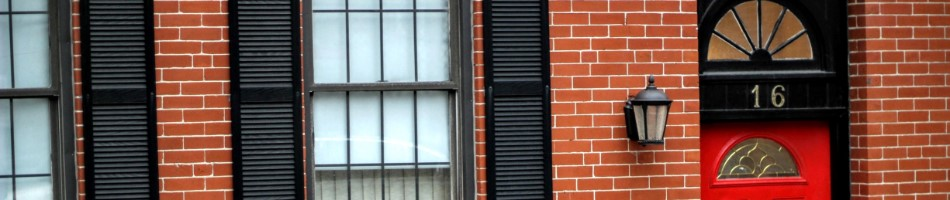

**1. Overview**  
Airbnb provides a platform for property owners to rent out their spaces to travelers. Pricing a
listing effectively is critical for maximizing revenue while staying competitive in the market.
For hosts, understanding what factors influence the price of their listings is essential.
This project aims to build a machine learning model to predict the price of Airbnb listings
based on various features such as property type, room type, location, amenities, and host
characteristics. By analyzing these factors, this project will provide actionable insights to
Airbnb hosts to optimize their listing prices.

**2. Problem Statement**  
The primary objective of this project is to develop a regression model that predicts the price
of an Airbnb listing. Using features such as property type, room type, number of reviews,
location, and amenities, the model will aim to estimate the price accurately.
The insights derived from this analysis will help Airbnb hosts understand the key drivers of
price, enabling them to make data-driven decisions for pricing their properties. Additionally,
the project will help Airbnb refine its recommendations for pricing to improve host and guest
satisfaction.

**3. Dataset Information**  
**Dataset: [Airbnb_data](https://docs.google.com/spreadsheets/d/1N7P0euUjfjB8XXdTBQeicjGjxAOm18wvCRLaQC92a8g/edit?gid=693059640#gid=693059640)**  
The dataset information can be found in this doc **[Data Information](https://docs.google.com/document/d/1BhJoNJ9RgTgAHbAiOXh6tgTSjtuFkPox/edit?rtpof=true&sd=true&tab=t.0)**.

**4. Deliverables**  
**1. Data Exploration and Preprocessing**  
- Analyze the dataset for trends, missing values, and outliers.
- Perform data cleaning, feature engineering, and transformations.

**2. Model Development**
- Build a regression model to predict listing prices.

**3. Model Evaluation**
- Evaluate the model’s performance using appropriate metrics like RMSE, MAE, and R2.

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# upload dataset
df = pd.read_csv('Airbnb_data.csv')
# displaying few rows of dataset
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
# data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
# Duplicate values
df.duplicated().sum()

np.int64(0)

#### Handle Missing Values
Using percentage to find missing values would give a clearer representation of the missing values in the dataset.

In [6]:
# Find percentage of null values
df.isnull().sum()/len(df)*100

id                         0.000000
log_price                  0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.269865
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.405729
host_has_profile_pic       0.253674
host_identity_verified     0.253674
host_response_rate        24.691341
host_since                 0.253674
instant_bookable           0.000000
last_review               21.355804
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.272578
number_of_reviews          0.000000
review_scores_rating      22.563452
thumbnail_url             11.086074
zipcode                    1.306149
bedrooms                   0

In [7]:
# removing the missing rows
df1=df.dropna()

In [8]:
# Drop columns
df1=df1.drop(['id','description','thumbnail_url','zipcode','name'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries, 1 to 74110
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               38502 non-null  float64
 1   property_type           38502 non-null  object 
 2   room_type               38502 non-null  object 
 3   amenities               38502 non-null  object 
 4   accommodates            38502 non-null  int64  
 5   bathrooms               38502 non-null  float64
 6   bed_type                38502 non-null  object 
 7   cancellation_policy     38502 non-null  object 
 8   cleaning_fee            38502 non-null  bool   
 9   city                    38502 non-null  object 
 10  first_review            38502 non-null  object 
 11  host_has_profile_pic    38502 non-null  object 
 12  host_identity_verified  38502 non-null  object 
 13  host_response_rate      38502 non-null  object 
 14  host_since              38502 non-null  obj

In [9]:
df1.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000
mean,4.745546,3.233754,1.215197,38.759075,-90.895232,32.975014,94.332217,1.252402,1.759259
std,0.658015,2.137687,0.551349,3.007696,21.446666,45.420254,6.876715,0.836481,1.287905
min,0.000000,1.000000,0.000000,33.705835,-122.511500,1.000000,20.000000,0.000000,0.000000
25%,4.304065,2.000000,1.000000,34.185077,-118.326008,5.000000,92.000000,1.000000,1.000000
50%,4.700480,2.000000,1.000000,40.682550,-74.001777,16.000000,96.000000,1.000000,1.000000
75%,5.164786,4.000000,1.000000,40.760402,-73.949291,42.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-71.000462,542.000000,100.000000,10.000000,18.000000


## Data Wrangling & EDA

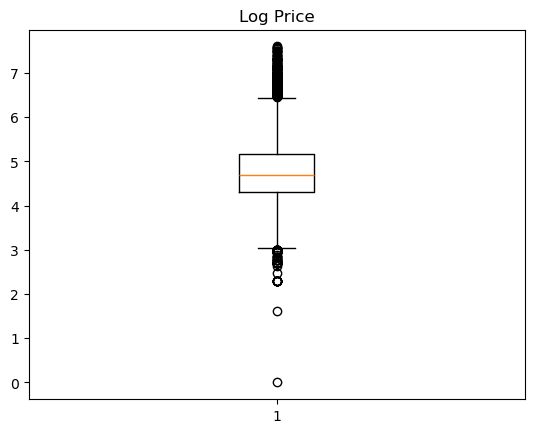

In [10]:
# Boxplot of log price
plt.boxplot(df1['log_price'])
plt.title('Log Price')
plt.show()

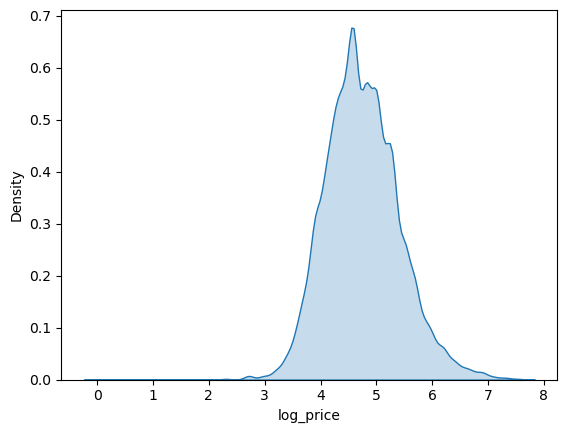

In [11]:
# Kdeplot for log price
sns.kdeplot(df1['log_price'],fill=True)
plt.show()

- Based on the boxplot, there are noticeable outliers, and the data exhibits a left-skewed distribution, indicating a longer tail on the left side.

In [12]:
# group by property type and log price
pr_log = df1.groupby('property_type').agg(
    sum_log_price = ('log_price','sum'),
    count_property = ('log_price','count')
).reset_index()
pr_log = pr_log.sort_values(by="sum_log_price",ascending=False)
pr_log

,property_type,sum_log_price,count_property
0,Apartment,117513.262316,24752
16,House,41924.150243,8903
10,Condominium,7013.737040,1421
25,Townhouse,4465.945826,940
19,Loft,3582.215597,719
20,Other,1579.183884,331
14,Guesthouse,1557.707351,335
1,Bed & Breakfast,1293.951705,286
4,Bungalow,1028.597097,216
13,Guest suite,457.807457,97


- Most common property type: Apartment (24752 listings) with the highest total log price.
- Less common types like Train, Cave, Earth House have 1,2,3 listing.
- The data is heavily skewed toward Apartments and Houses, while some property types are very rare.

In [13]:
# groupby roomtype and log_price
room = df1.groupby('room_type').agg(
    sum_log_price=('log_price','sum'),
    count_room_type=('log_price','count')
).reset_index()
room

,room_type,sum_log_price,count_room_type
0,Entire home/apt,109990.158364,21495
1,Private room,69082.516719,16045
2,Shared room,3640.350288,962


- Entire home/apt shows the highest log price compared to others.

In [14]:
# groupby accommodates by logprice
accommodates = df1.groupby('accommodates').agg(
    sum_log_price=('log_price','sum'),
    count_accommodates=('log_price','count')
).reset_index()
accommodates = accommodates.sort_values('sum_log_price',ascending=False)
accommodates

,accommodates,sum_log_price,count_accommodates
1,2,76300.506678,16896
3,4,32634.238394,6545
2,3,20029.879514,4217
0,1,15748.479462,3821
5,6,14672.248895,2748
4,5,9354.744959,1810
7,8,5519.680199,980
6,7,2935.151900,538
9,10,2114.893104,367
15,16,829.485135,138


In [15]:
# City
df1['city'].value_counts()

city
NYC        17856
LA         10068
SF          3601
DC          2409
Boston      2365
Chicago     2203
Name: count, dtype: int64

In [16]:
df1['neighbourhood'].value_counts()

neighbourhood
Williamsburg          1523
Bedford-Stuyvesant    1337
Bushwick               867
Mid-Wilshire           846
Harlem                 813
                      ... 
Takoma Park, MD          1
Chevy Chase, MD          1
Garfield Heights         1
Old Soldiers' Home       1
New Springville          1
Name: count, Length: 586, dtype: int64

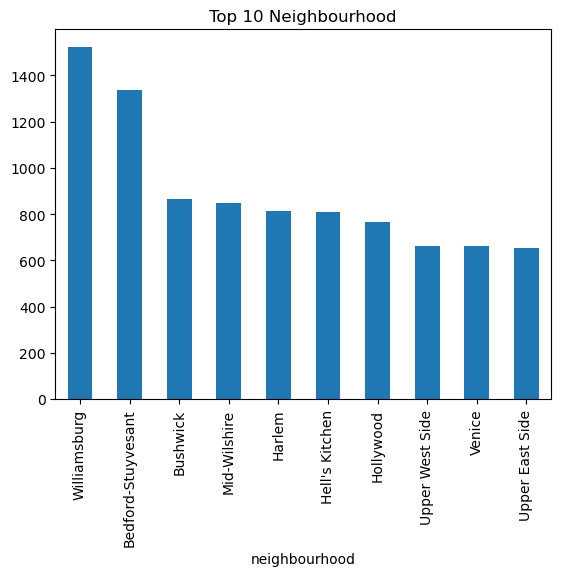

In [17]:
# Neighborhood popularity
df1['neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Neighbourhood')
plt.show()

- These are the top 10 neighbourhoods. The neighbourhood column contains 586 unique categories.

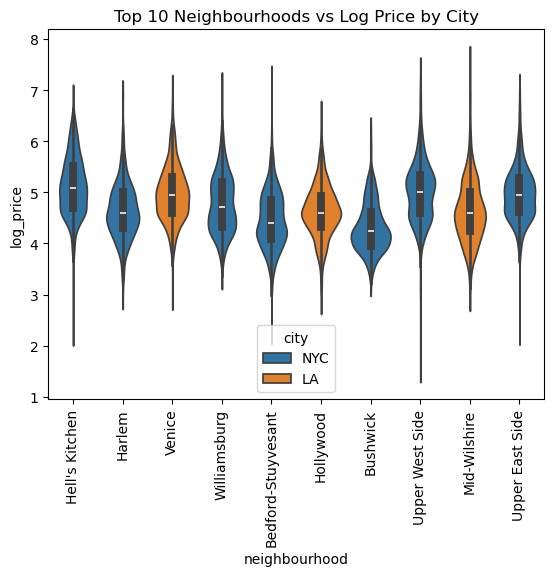

In [18]:
top_neig=df1['neighbourhood'].value_counts().head(10).index
# filter data only for top 10 neighbour
df_top=df1[df1['neighbourhood'].isin(top_neig)]

# Display
sns.violinplot(data=df_top,x='neighbourhood',y='log_price',hue='city')
plt.title("Top 10 Neighbourhoods vs Log Price by City")
plt.xticks(rotation=90)
plt.show()

- The majority of the top 10 neighbourhoods are located in NYC.

### Handling Dates variables and Creating a New Feature

In [19]:
# converting date variables to datetime
cols=['first_review','host_since','last_review']
df1[cols]=df1[cols].apply(pd.to_datetime,dayfirst=True)

In [20]:
# create numeric feature
df1['host_day']=(pd.Timestamp('today')-df1['host_since']).dt.days
# Days since last review
df1['days_last_review']=(pd.Timestamp('today')-df1['last_review']).dt.days
# Review span (last - first)
df1['review_span_days']=(df1['last_review']-df1['first_review']).dt.days

In [21]:
cols=['first_review','host_since','last_review','host_day','days_last_review','review_span_days']
df1[cols].head()

,first_review,host_since,last_review,host_day,days_last_review,review_span_days
1,2017-08-05,2017-06-19,2017-09-23,3018,2922,49
2,2017-04-30,2016-10-25,2017-09-14,3255,2931,137
5,2017-08-27,2017-06-07,2017-09-05,3030,2940,9
7,2016-12-16,2013-05-18,2017-04-12,4511,3086,117
8,2016-02-13,2015-06-04,2017-09-24,3764,2921,589


In [22]:
# remove date variable
df1=df1.drop(['first_review','host_since','last_review'],axis=1)

In [23]:
# Remove '%' and convert to float host response rate
df1['host_response_rate']=df1['host_response_rate'].str.rstrip('%').astype(float)

In [24]:
# creating box plot for numeric columns
num_cols = df1.select_dtypes(include='number').columns
num_cols

Index(['log_price', 'accommodates', 'bathrooms', 'host_response_rate',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_day', 'days_last_review', 'review_span_days'],
      dtype='object')

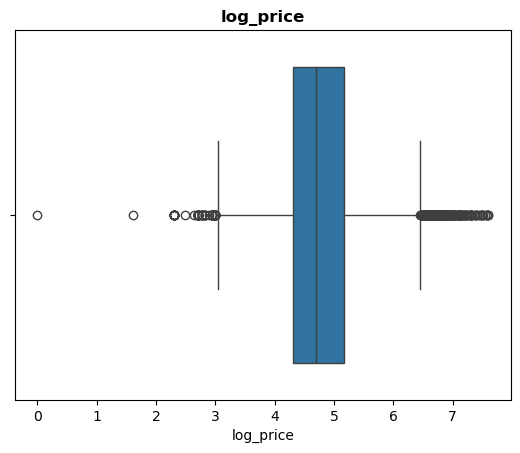

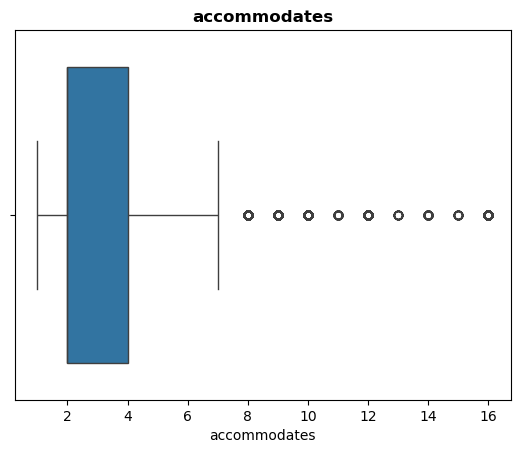

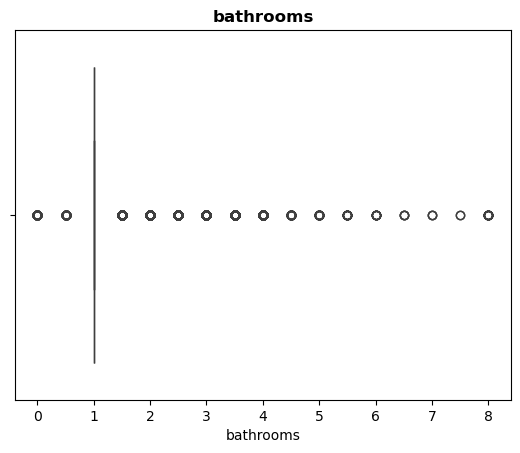

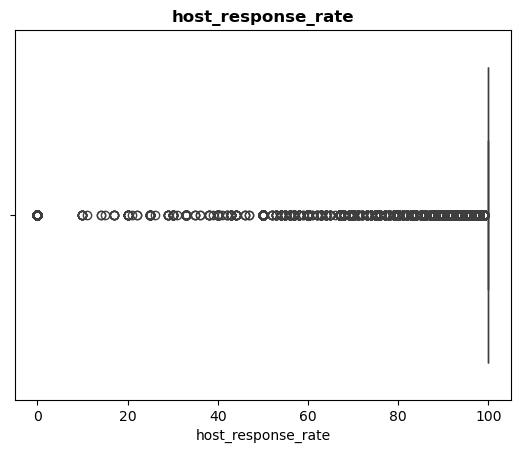

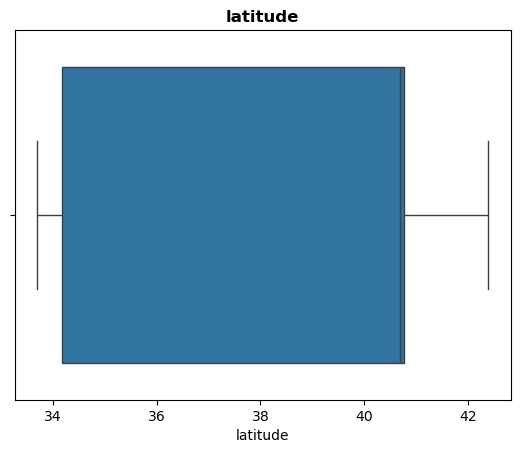

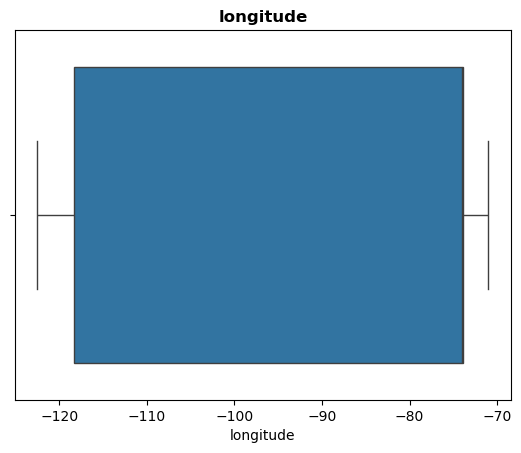

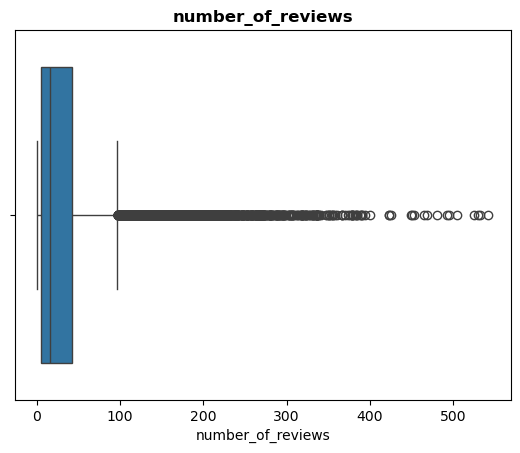

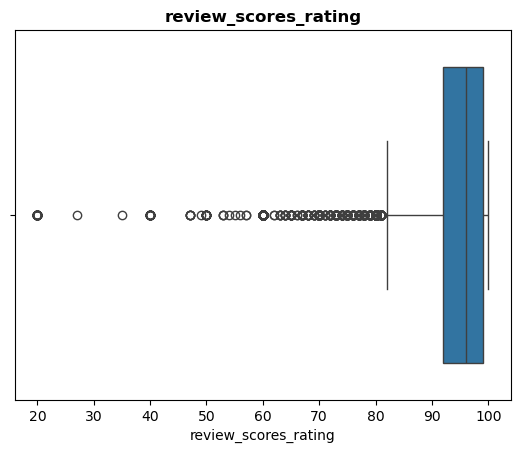

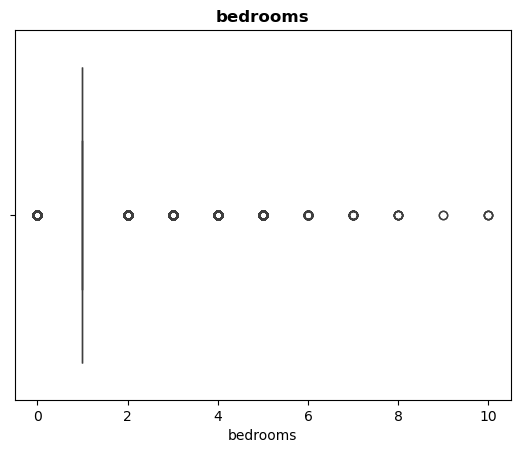

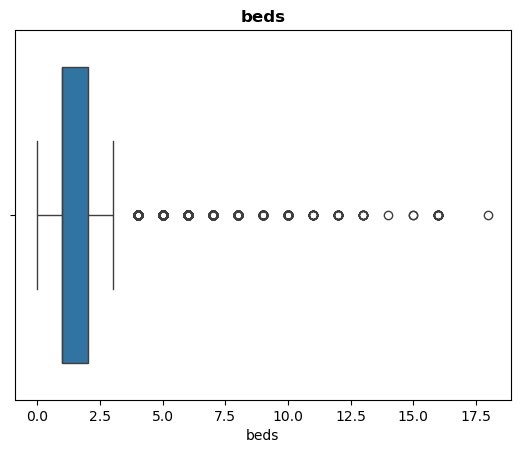

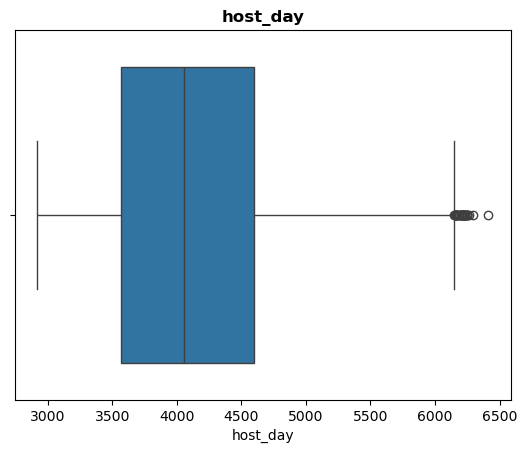

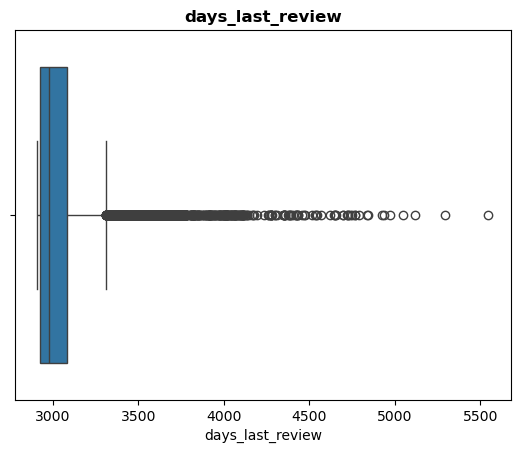

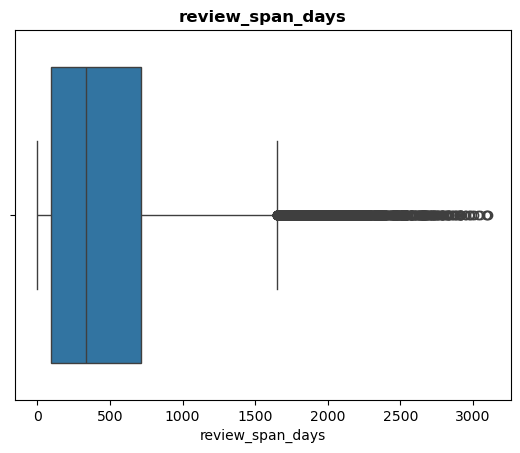

In [25]:
# Box plot
for i in num_cols:
    sns.boxplot(x=df1[i])
    plt.title(i,fontweight='bold')
    plt.show()

#### Outliars
- Log price columns have outliars.
- latitude and longitude have no outliers.
> They are geographical coordinates.By themselves, they usually don’t have a linear relationship with the target variable.
- bathrooms, bedrooms, beds, host response rate and accomadation: These are discrete numeric features with a limited number of meaningful values (e.g., 1, 2, 3). Applying outlier capping could distort their real-world significance (e.g., reducing 5 bathrooms to 2 would misrepresent a luxury listing).
- Number of reviews, review scores rating, host day, day last review and review_span_days have outliers.

In [26]:
colsforoutliers =['log_price','number_of_reviews', 'review_scores_rating','host_day', 'days_last_review', 'review_span_days']
def iqr_capping(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    lower=(Q1-1.5*IQR)
    upper=(Q3+1.5*IQR)
    return x.clip(lower,upper)

df1[colsforoutliers]=df1[colsforoutliers].apply(iqr_capping)

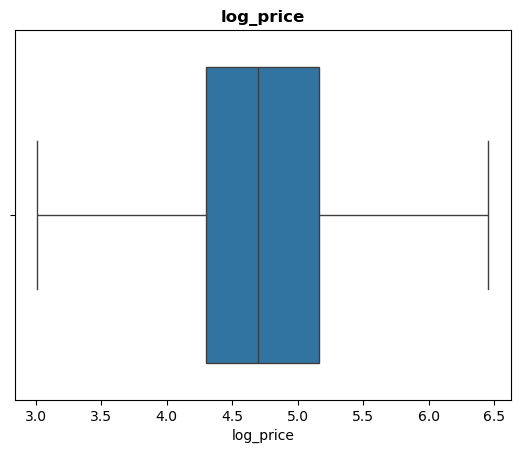

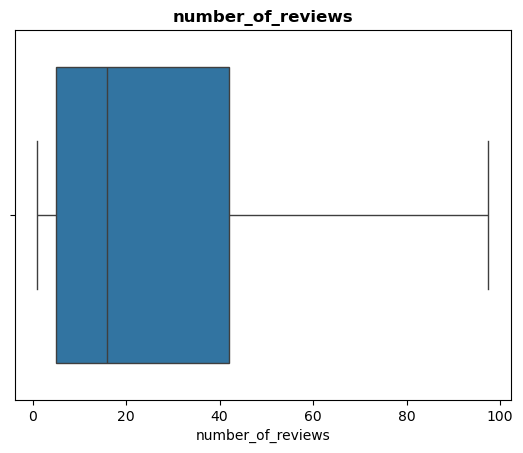

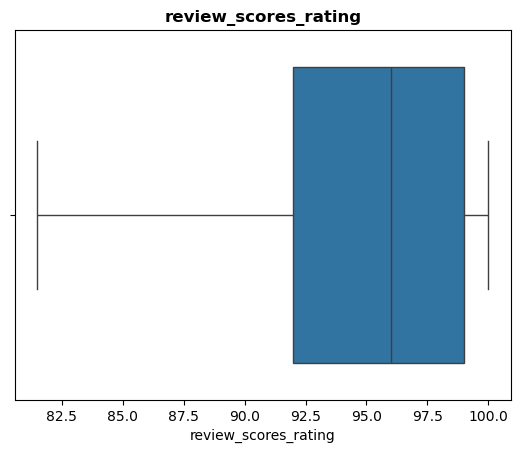

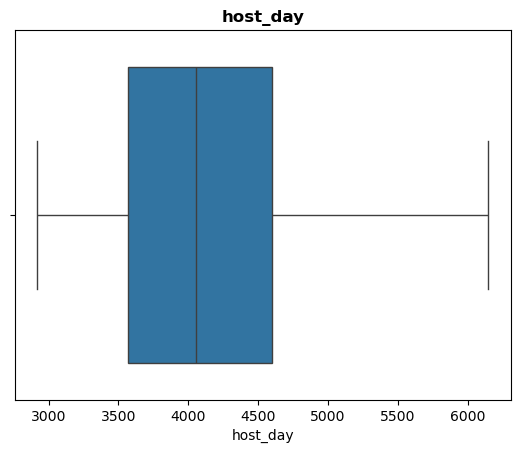

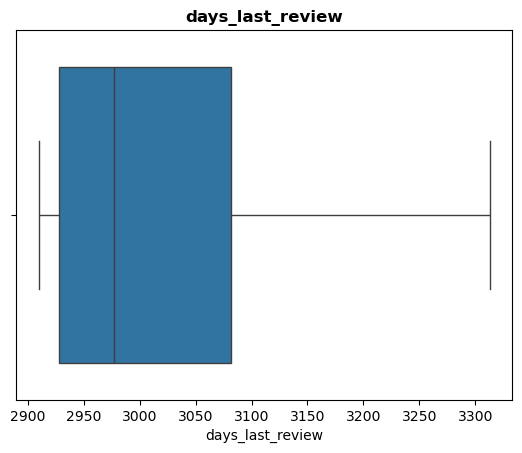

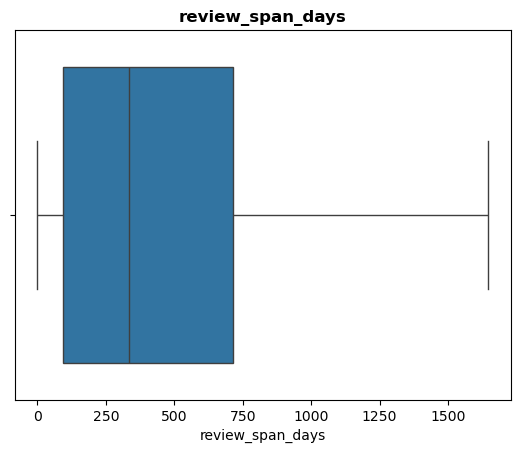

In [27]:
for i in colsforoutliers:
    sns.boxplot(x=df1[i])
    plt.title(i,fontweight='bold')
    plt.show()

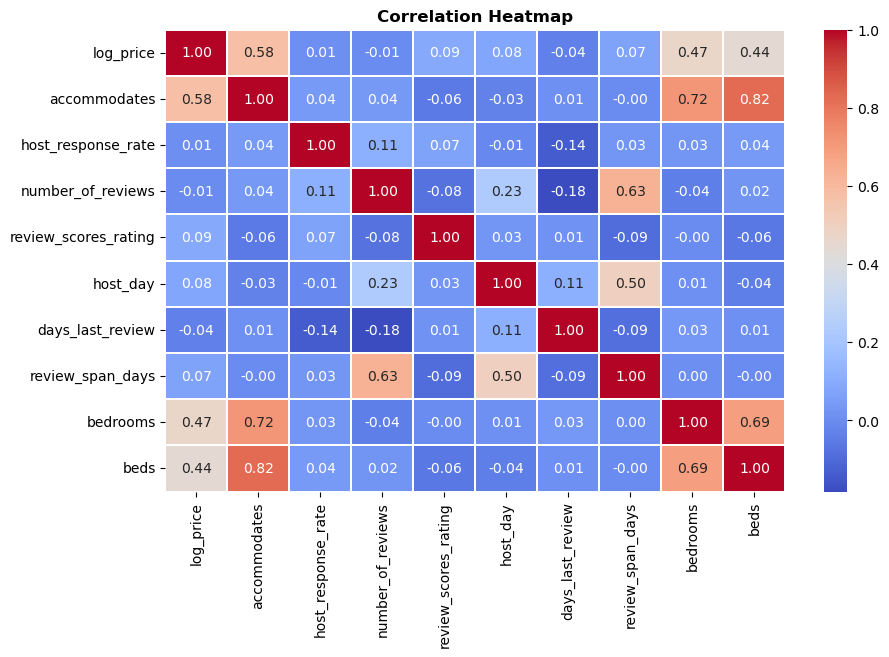

In [28]:
# create heatmap
cols_for_heatmap = ['log_price','accommodates','host_response_rate','number_of_reviews','review_scores_rating',
    'host_day','days_last_review','review_span_days','bedrooms','beds'
]
plt.figure(figsize=(10,6))
sns.heatmap(df1[cols_for_heatmap].corr(),annot=True,fmt='.2f',linewidths=0.3,cmap='coolwarm')
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

- accommodates, bedrooms, and beds are highly related ➡️ they measure similar things (capacity).
- We can drop one of them if using linear regression to avoid multicollinearity.
- For tree-based models (e.g., Random Forest, XGBoost), multicollinearity is less of a problem.

In [30]:
# amenities
df1['amenities'][1]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [31]:
# clean the amenities
df1['amenities_list']=df1['amenities'].str.replace(r'[{}"]','',regex=True).str.split(',')
df1['amenities_list'][1]

['Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Family/kid friendly',
 'Washer',
 'Dryer',
 'Smoke detector',
 'Fire extinguisher',
 'Essentials',
 'Shampoo',
 'Hangers',
 'Hair dryer',
 'Iron',
 'translation missing: en.hosting_amenity_50']

In [32]:
# Flatten the list of all amenities
all_amenities=[amenity for sublist in df1['amenities_list'] for amenity in sublist]

# count frequency
amenity_counts=Counter(all_amenities)
# Convert to DataFrame for easy viewing
amenity_df = pd.DataFrame(amenity_counts.items(), columns=['Amenity', 'Count'])
amenity_df = amenity_df.sort_values(by='Count', ascending=False)

print(amenity_df.head(10)) 

                     Amenity  Count
0          Wireless Internet  37794
3                    Heating  36257
2                    Kitchen  35041
9                 Essentials  34885
7             Smoke detector  33539
1           Air conditioning  29473
11                   Hangers  29001
10                   Shampoo  28091
15                        TV  27817
19  Carbon monoxide detector  27084


In [33]:
# top 10 amenity
top_10 = amenity_df.head(10)['Amenity']
for amenity in top_10:
    df1[amenity]=df1['amenities_list'].apply(lambda x:1 if amenity in x else 0)

# Drop amenities categorical columns and latitude, longitude
df1 = df1.drop(['amenities','amenities_list','latitude','longitude'],axis=1)
df1.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,Wireless Internet,Heating,Kitchen,Essentials,Smoke detector,Air conditioning,Hangers,Shampoo,TV,Carbon monoxide detector
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,...,1,1,1,1,1,1,1,1,0,0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,...,1,1,1,1,1,1,1,1,1,1
5,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,t,...,1,1,0,1,1,0,1,0,1,1
7,4.787492,Condominium,Entire home/apt,2,1.0,Real Bed,moderate,True,LA,t,...,1,1,1,1,1,0,1,1,1,1
8,4.787492,House,Private room,2,1.0,Real Bed,moderate,True,SF,t,...,1,1,0,1,1,0,1,1,1,0


##### Standardize Boolean Columns

In [34]:
# convert categorical columns. These contain values like 't', 'f', True, False
bool_map={'t':1,'f':0,True:1,False:0}
df1['cleaning_fee']=df1['cleaning_fee'].map(bool_map)
df1['host_has_profile_pic']=df1['host_has_profile_pic'].map(bool_map)
df1['host_identity_verified']=df1['host_identity_verified'].map(bool_map)
df1['instant_bookable']=df1['instant_bookable'].map(bool_map)

In [38]:
# There is 31 unique property
# Instead of counts, replace categories with mean price for that category
mean_map=df1.groupby('property_type')['log_price'].mean().to_dict()
df1['property_type_mean']=df1['property_type'].map(mean_map)
df1.drop('property_type',axis=1,inplace=True)

In [40]:
# apply one hot encode for low cardinality categorical variables
df1=pd.get_dummies(df1,columns=['room_type', 'bed_type',
    'cancellation_policy', 'city'], drop_first=True)

In [41]:
# Frequency Encoding for neighbourhood Replace each category with how often it appears.
freq_map=df1['neighbourhood'].value_counts().to_dict()
df1['neighbourhood_freq']=df1['neighbourhood'].map(freq_map)
df1.drop('neighbourhood',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries, 1 to 74110
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   log_price                            38502 non-null  float64
 1   accommodates                         38502 non-null  int64  
 2   bathrooms                            38502 non-null  float64
 3   cleaning_fee                         38502 non-null  int64  
 4   host_has_profile_pic                 38502 non-null  int64  
 5   host_identity_verified               38502 non-null  int64  
 6   host_response_rate                   38502 non-null  float64
 7   instant_bookable                     38502 non-null  int64  
 8   number_of_reviews                    38502 non-null  float64
 9   review_scores_rating                 38502 non-null  float64
 10  bedrooms                             38502 non-null  float64
 11  beds                             

In [42]:
# split the data into training and testing set
x=df1.drop(columns=['log_price'])
y=df1['log_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# Check the new split sizes
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (30801, 41)
Test set size: (7701, 41)


In [43]:
# define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
}

In [45]:
# Train and evaluate models
results=[]

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    results.append([name,mae,mse,r2])

# Create comparison table
results_df = pd.DataFrame(results,columns=["model","mae","mse","r2"])
print(results_df.sort_values(by="r2",ascending=False))

  File "C:\Users\ravir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ravir\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ravir\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ravir\anaconda3\Lib\subprocess.

               model       mae       mse        r2
6            XGBoost  0.254459  0.110827  0.729258
2      Random Forest  0.263326  0.120674  0.705203
4            Bagging  0.278159  0.133406  0.674100
0  Linear Regression  0.306213  0.152711  0.626940
3           AdaBoost  0.350126  0.192524  0.529680
1      Decision Tree  0.380159  0.253348  0.381093
5                KNN  0.516291  0.432445 -0.056426


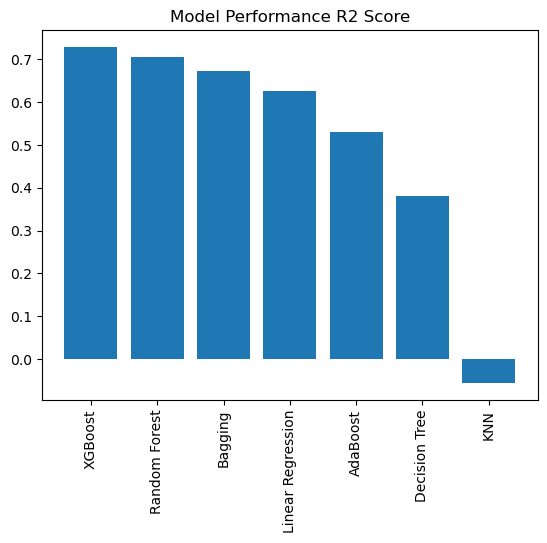

In [46]:
# display r2
results_df=results_df.sort_values('r2',ascending=False)
plt.bar(results_df['model'],results_df['r2'])
plt.title('Model Performance R2 Score')
plt.xticks(rotation=90)
plt.show()

- XGBoost ➡️ Best performer (Highest R2, lowest errors)
- Random Forest ➡️ Second-best, very close to XGBoost
- Bagging ➡️ Decent, but worse than RF/XGBoost
- Linear Regression ➡️ Okay, but less accurate for non-linear relationships
- AdaBoost & Decision Tree ➡️ Not great
- KNN ➡️ Performed very poorly (negative R2 means it’s worse than predicting the mean)

In [47]:
# Cross Validation
cv_result=[]
for name, model in models.items():
    scores=cross_val_score(model,x,y,cv=5,scoring='r2')
    cv_result.append([name,np.mean(scores),np.std(scores)])

cv_df=pd.DataFrame(cv_result,columns=["Model","Mean r2","Std Dev"])
cv_df=cv_df.sort_values(by="Mean r2",ascending=False)
cv_df

,Model,Mean r2,Std Dev
6,XGBoost,0.727804,0.005852
2,Random Forest,0.705835,0.005363
4,Bagging,0.676686,0.005872
0,Linear Regression,0.629104,0.010162
3,AdaBoost,0.535829,0.010913
1,Decision Tree,0.388995,0.012396
5,KNN,-0.048913,0.005132


- Cross-validation confirms XGBoost as the best model, Random Forest as a strong alternative, and simpler models (Linear Regression, Decision Tree, KNN) are less effective.

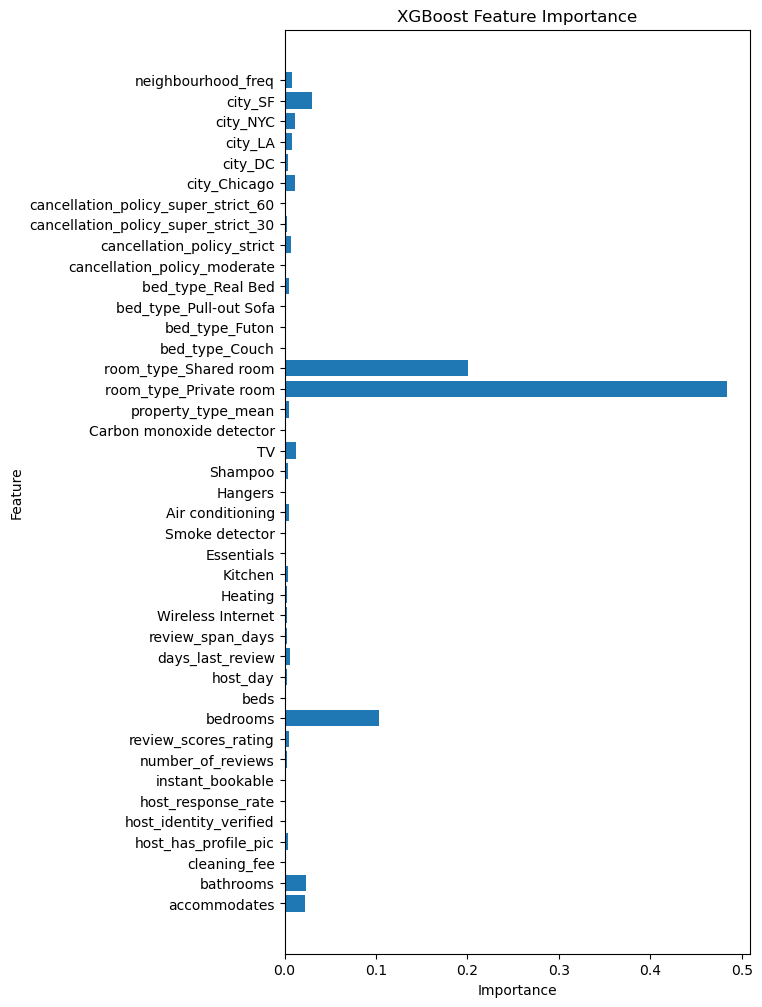

In [49]:
xgb_model = models['XGBoost'] 

plt.figure(figsize=(6,12))
plt.barh(x_train.columns, xgb_model.feature_importances_)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()